# Rabi Oscillations

We study Rabi oscillations as in the paper [Revising quantum optical phenomena in adatoms coupled to graphene nanoantennas](https://www.degruyter.com/document/doi/10.1515/nanoph-2022-0154/html).

NOTE: It is a good idea to get familiar with orbital lists by consulting the tutorial first.

## Building a two-level system

We set up an isolated adatom.

In [1]:
from granad import Orbital, OrbitalList

atom = OrbitalList([Orbital(), Orbital()])
atom.set_electrons( 1 )
atom.set_hamiltonian_element(1, 1, 0.5)
atom.set_hamiltonian_element(0, 0, -0.5)
atom.set_dipole_element(1, 0, [0, 7.5, 0])

We study undamped time evolution under harmonic illumination

finished timestep 0
RHS compiled


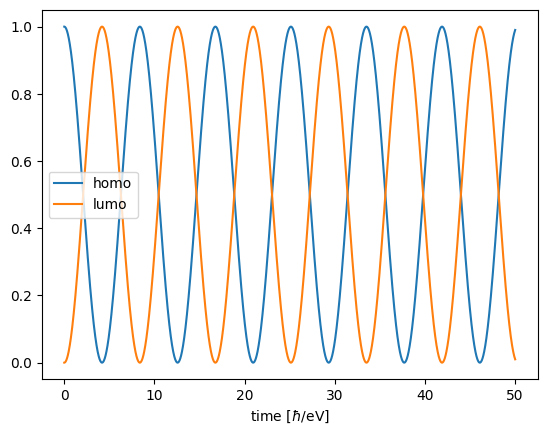

In [2]:
from granad import Wave
wave = Wave(amplitudes=[0, 0.05, 0], frequency=1)
result = atom.td_run(
    end_time=50,
    grid = 10,
    illumination=wave,
    use_rwa=True,
    coulomb_strength = 0.0,
    density_matrix = ["occ_e"],
)
atom.show_res(result, plot_only = [atom.homo, atom.homo+1], plot_labels = ["homo", "lumo"], show_illumination = False)

## Coupling to a Flake

We combine the TLS with a graphene flake in the top position above an atom.

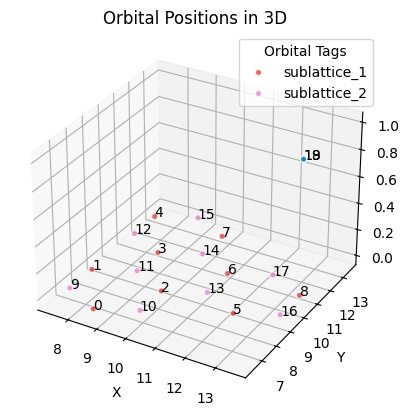

In [3]:
import jax.numpy as jnp
from granad import MaterialCatalog, Triangle
graphene = MaterialCatalog.get("graphene")
flake = graphene.cut_flake(Triangle(10, armchair = True, shift = [10,10]), plot=False)
flake_with_atom = flake + atom
pz_orbital = flake_with_atom[8]
top = pz_orbital.position + jnp.array([0, 0, 1])
flake_with_atom.set_position(top, atom)
flake_with_atom.show_3d(show_index=True)

We set the couplings

In [4]:
flake_with_atom.set_hamiltonian_element(pz_orbital, atom[0], 1)
flake_with_atom.set_hamiltonian_element(pz_orbital, atom[1], 1)

Now, the time evolution of the composite system

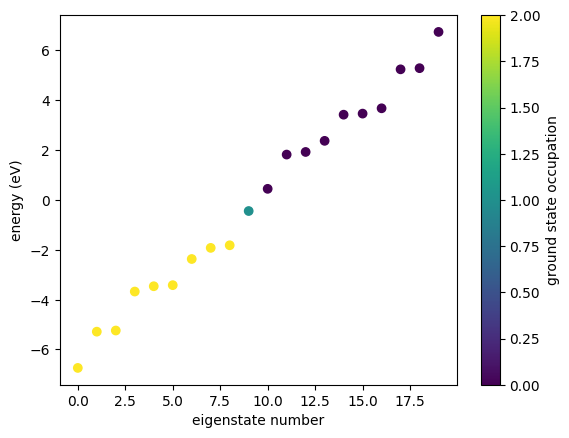

finished timestep 0
RHS compiled


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


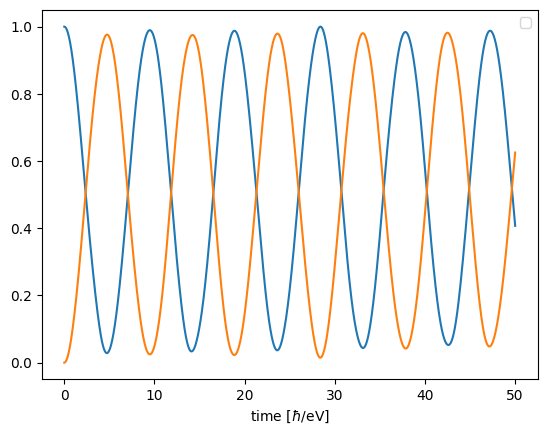

In [5]:
flake_with_atom.show_energies()
result = flake_with_atom.td_run(
    grid = 10,
    end_time=50,
    illumination=wave,
    use_rwa=True,
    coulomb_strength = 0.0,
    density_matrix = ["occ_e"],
)
flake_with_atom.show_res( result, plot_only = [9,10], show_illumination = False )